<a href="https://colab.research.google.com/github/AchinthaThennakoon/deep-learning-tutorial/blob/main/After_Data_Augmentation_To_Handle_Overfitting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

In [3]:
from google.colab.patches import cv2_imshow

# Load data set

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
img_dir ='/content/drive/MyDrive/Colab Notebooks/DL/src'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir=img_dir, untar=True)

228813984/228813984 [==============================] - 3s 0us/step


untar=true -> unzip file


In [5]:
data_dir

'/tmp/.keras/datasets/flower_photos'

The pathlib module offers an object-oriented approach to handle filesystem paths, which can make your code cleaner and more readable.

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

getting all images  with .jpg extension

In [7]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/17020815734_81e8db8008_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/7132482331_01769e36e9_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/23192507093_2e6ec77bef_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/13916196427_50a611008f.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/3664916269_29f07c7c7b.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/9200211647_be34ce978b.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/7808430998_31ba639031_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/7165651120_2279ebf6d1.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/5651310874_c8be336c2b.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/14439618952_470224b89b_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/7262863194_682209e9fb.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/15236835789_6009b8f33d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/18760363474_a707331322_n.jpg')]

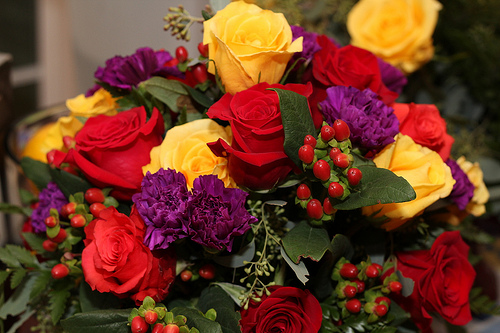

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/15236835789_6009b8f33d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/18760363474_a707331322_n.jpg')]

In [14]:
flowers_images_dict['roses'][0]

PosixPath('/tmp/.keras/datasets/flower_photos/roses/218630974_5646dafc63_m.jpg')

array([[[ 0, 18,  5],
        [ 2, 20,  7],
        [ 0, 17,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3, 10,  5],
        [ 8, 15, 10],
        [ 8, 16,  9],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 5,  4,  6],
        [ 7,  7,  7],
        [ 7,  8,  6],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       ...,

       [[14, 31, 20],
        [ 9, 25, 18],
        [ 6, 21, 17],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 5, 33, 13],
        [ 3, 23, 11],
        [ 6, 17, 15],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[10, 46, 16],
        [ 6, 29, 14],
        [12, 20, 19],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)
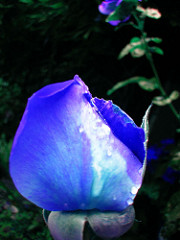

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

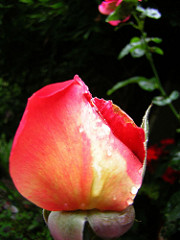

In [16]:
cv2_imshow(img)

# Preprocess

## Resize images

In [17]:
x,y =[],[]

for flower_name,images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


in ML it is more efficient when all of them are in one scale

In [18]:
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name]) # to get number related to flower

In [19]:
y[:5]

[0, 0, 0, 0, 0]

In [20]:
x[0].shape

(180, 180, 3)

array([[[ 0, 17,  5],
        [ 3, 19,  7],
        [ 1, 17,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 4,  7,  6],
        [ 8, 11,  9],
        [ 8, 12,  8],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       [[12, 21, 16],
        [ 9, 15, 11],
        [ 4, 10,  5],
        ...,
        [ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1]],

       ...,

       [[16, 24, 18],
        [12, 27, 19],
        [ 9, 31, 19],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[10, 32, 17],
        [ 6, 24, 15],
        [ 6, 19, 16],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 9, 44, 15],
        [ 5, 28, 13],
        [11, 19, 18],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)
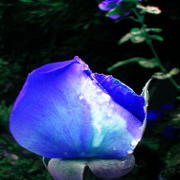

In [21]:
x[0]

for convenience convert to numpy array

In [22]:
x = np.array(x)
y = np.array(y)

# split train and test data set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [24]:
X_train_scaled = X_train/255
X_test_sclaed = X_test/255

# Augmentation

In [25]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

## orginal

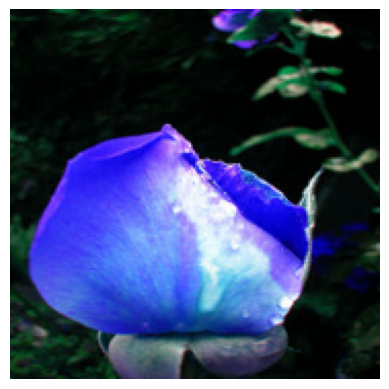

In [26]:
plt.axis('off')
plt.imshow(x[0])

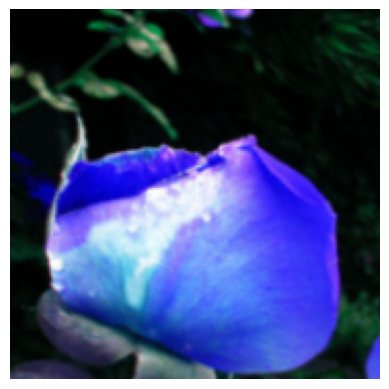

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 94s 1s/step - loss: 1.3298 - accuracy: 0.4310
Epoch 2/10
86/86 [==============================] - 91s 1s/step - loss: 1.0700 - accuracy: 0.5734
Epoch 3/10
86/86 [==============================] - 91s 1s/step - loss: 0.9670 - accuracy: 0.6170
Epoch 4/10
86/86 [==============================] - 91s 1s/step - loss: 0.8742 - accuracy: 0.6570
Epoch 5/10
86/86 [==============================] - 90s 1s/step - loss: 0.8172 - accuracy: 0.6846
Epoch 6/10
86/86 [==============================] - 90s 1s/step - loss: 0.7623 - accuracy: 0.7068
Epoch 7/10
86/86 [==============================] - 95s 1s/step - loss: 0.7240 - accuracy: 0.7188
Epoch 8/10
86/86 [==============================] - 92s 1s/step - loss: 0.7003 - accuracy: 0.7406
Epoch 9/10
86/86 [==============================] - 91s 1s/step - loss: 0.6628 - accuracy: 0.7449
Epoch 10/10
86/86 [==============================] - 91s 1s/step - loss: 0.6446 - accuracy: 0.7678


In [31]:
model.evaluate(X_test_sclaed,y_test)

29/29 [==============================] - 9s 288ms/step - loss: 0.7665 - accuracy: 0.7081


[0.7664728164672852, 0.7080609798431396]